# Google Api

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [26]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/test/'
imgs = os.listdir(path)
image_list = []
for i in imgs:
    # detect_text(i)
    image_list.append(os.path.join(path,i))
image_list
for i in image_list:
    detect_text(i)
# path = # [[YOUR IMAGE FILE PATH]]   

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)

-rw-rw-r-- 1 aiffel-dj26 aiffel-dj26 2331  3월 16 09:46 /home/aiffel-dj26/aiffel/ocr_python/my_google_api_key.json
Texts:

"위기는 기회이며
벼랑끝에 선자가
가장 강한법이다h
"

"위기"

"는"

"기회"

"이며"

"벼랑"

"끝에"

"선자"

"가"

"가장"

"강한"

"법"

"이다"

"h"
bounds: (231,82),(237,79),(246,99),(240,102)
Texts:

"저 지금 안과 좀 가야겠어요.
요즘 세상이 온통
당신의 얼굴로 도배되어 있거든요.
"

"저"

"지금"

"안과"

"좀"

"가야"

"겠어요"

"."

"요즘"

"세상"

"이"

"온통"

"당신"

"의"

"얼굴"

"로"

"도배"

"되어"

"있거든요"

"."
bounds: (763,271),(785,271),(785,344),(763,344)
Texts:

"기분이 저기압일땐
반드시
고기앞으로 가라
"

"기분"

"이"

"저기압"

"일땐"

"반드시"

"고기"

"앞으로"

"가라"
bounds: (203,110),(249,111),(249,133),(203,132)
Texts:

"힘들 때 하늘을 보면
달라지는건 없다.
-못긴 명언-
"

"힘들"

"때"

"하늘"

"을"

"보면"

"달라지는"

"건"

"없다"

"."

"-"

"못긴"

"명언"

"-"
bounds: (168,96),(171,96),(171,96),(168,96)


# keras OCR

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj26/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj26/.keras-ocr/crnn_kurapan.h5


In [ ]:
def keras_ocr(path):
    Image.open(path)
    return pipeline.recognize([])

In [27]:


images = [ keras_ocr.tools.read(url) for url in image_list]
prediction_groups = [pipeline.recognize([url]) for url in image_list]

/home/aiffel-dj26/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


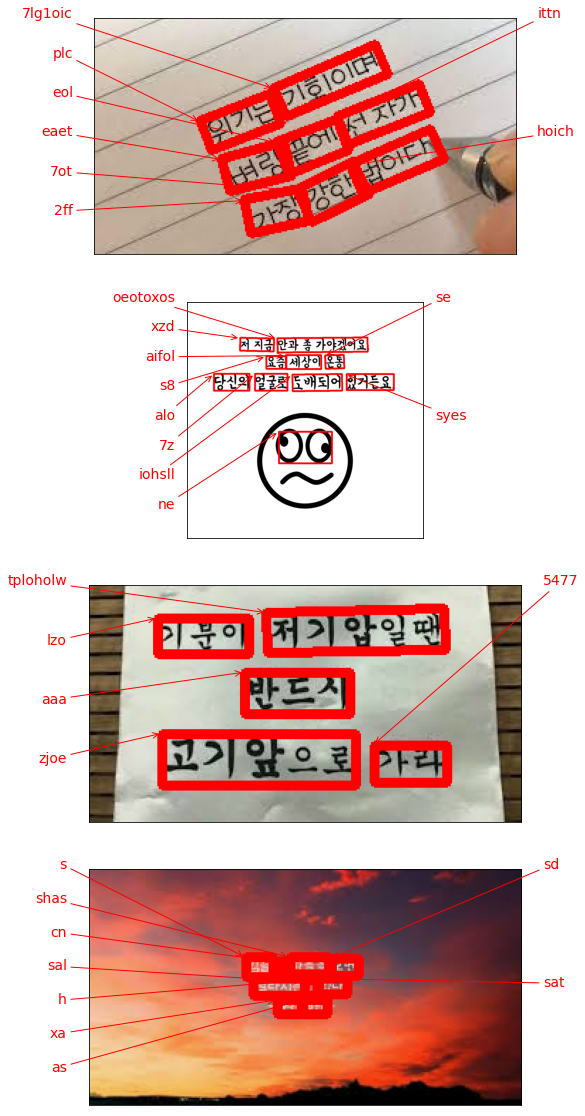

In [28]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

In [31]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            # print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesser'



In [33]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
for i in imgs:
    cropped_image_path_list = crop_word_regions(os.path.join(path,i), os.path.join(work_dir,i))
    recognize_images(cropped_image_path_list)

> ~

Done
저

지금

안과

종

7

}아

겠어요

요

즉

세

상ㅇ0

ㅣ 온동

당

신

오

] 엉

굴

도

둑

배

되어

이거든 요.

Done
|

둘

ㅣ

저

기

압

일

땐

반드시

호

기

앞

으 도

가리

Done

Done


## 평가 기준
한국어를 잘 읽을 수 있어야하며 단어와 조사 등이 잘 붙어있고 의미를 제대로 파악할 수 있게 관찰하였는지 중요하게 볼 것이다.  
4장의 한글 명언 사진을 구비하였다.  
<img src="./image/1" width="300" height="300">
<img src="./image/2" width="300" height="300">
<img src="./image/3" width="300" height="300">
<img src="./image/4" width="300" height="300">     
 1 Google Api는 성공적으로 문장 자체를 인식하였고 한글이어도 상관이 없었다. 또한 문장이외에 단어 인식을 가장 잘 하였다.    
 2 keras_OCR은 문자 공간에 대한 건 인식하였지만 한글로 인식이 안되었다. 이모티콘을 영어로 인식하는 경우도 있었다.  
 3 Tesseract는 가장 안좋은 결과가 나왔다. 한글을 지원하지만 애초에 글 자체를 인식하지 못하였다. 못하는 경우가 어느 경우인지도 파악하기 힘든 모델로 실제로 쓸모가 있을 만큼의 성능이 나오지 않았다.
# 고찰
사용량이 많으면 돈내고 사용하는 구글API이 제일 좋은 성능을 낼수밖에 없겠지만 성능차이가 너무 많이나서 놀랐다. 
